In [33]:
import pandas as pd
import numpy as np


# Carregando e processando os dados

In [34]:
df_tv_shows = pd.read_csv('tvshowsfinals.csv')
df_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2006 non-null   object 
 1   changed_network           2006 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                2006 non-null   object 
 4   metacritc_last_info_year  2006 non-null   int64  
 5   tvtime_followers          2006 non-null   float64
 6   tvtime_rate               2006 non-null   float64
 7   no_seasons                1337 non-null   float64
 8   eps_duration              2006 non-null   object 
 9   age_rating                828 non-null    object 
 10  imdb_rate                 2006 non-null   float64
 11  rotten_tomatoes_rate      2006 non-null   float64
 12  released_year             945 non-null    float64
 13  awards_won                2006 non-null   float64
 14  awards_n

## Removendo dados sem status

In [35]:
df_tv_shows_clean = df_tv_shows[~df_tv_shows['status'].isnull()] 
df_tv_shows_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1342 non-null   object 
 1   changed_network           1342 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                1342 non-null   object 
 4   metacritc_last_info_year  1342 non-null   int64  
 5   tvtime_followers          1342 non-null   float64
 6   tvtime_rate               1342 non-null   float64
 7   no_seasons                1046 non-null   float64
 8   eps_duration              1342 non-null   object 
 9   age_rating                643 non-null    object 
 10  imdb_rate                 1342 non-null   float64
 11  rotten_tomatoes_rate      1342 non-null   float64
 12  released_year             689 non-null    float64
 13  awards_won                1342 non-null   float64
 14  awards_n

## Computando dummies para dados categoricos

In [36]:
df_eps_duration_dummies = pd.get_dummies(df_tv_shows_clean['eps_duration'], prefix='duration')
df_network_dummies = pd.get_dummies(df_tv_shows_clean['tv_network'])
print(df_eps_duration_dummies.head())
df_network_dummies.head()

   duration_long  duration_normal  duration_short
0              0                1               0
2              0                1               0
5              0                1               0
6              0                1               0
7              0                1               0


,ABC,AMAZON,AMC,APPLE,CBS,DISNEY,FOX,FREEF,FX,HBO,...,SHOWTIME,STRZ,SYFY,TBS,THE CW,TNT,TVL,USA,YHOO,YT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Juntando dummies com os dados

In [37]:
df_tv_shows_final = pd.concat([df_tv_shows_clean, df_eps_duration_dummies, df_network_dummies], axis=1)
df_tv_shows_final.drop(columns=['name', 'age_rating', 'released_year', 'metacritc_last_info_year', 'eps_duration', 'tv_network', 'no_seasons'], inplace=True)
df_tv_shows_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   changed_network       1342 non-null   float64
 1   status                1342 non-null   object 
 2   tvtime_followers      1342 non-null   float64
 3   tvtime_rate           1342 non-null   float64
 4   imdb_rate             1342 non-null   float64
 5   rotten_tomatoes_rate  1342 non-null   float64
 6   awards_won            1342 non-null   float64
 7   awards_nominated      1342 non-null   float64
 8   duration_long         1342 non-null   uint8  
 9   duration_normal       1342 non-null   uint8  
 10  duration_short        1342 non-null   uint8  
 11  ABC                   1342 non-null   uint8  
 12  AMAZON                1342 non-null   uint8  
 13  AMC                   1342 non-null   uint8  
 14  APPLE                 1342 non-null   uint8  
 15  CBS                  

In [38]:
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed_but', 'status'] = 'renewed'

In [39]:
canceled_sample = df_tv_shows_final[df_tv_shows_final.status == 'canceled'].sample(frac=0.5)
not_canceled = df_tv_shows_final[(df_tv_shows_final.status != 'canceled') & (df_tv_shows_final.status != 'delayed')]
tv_shows_canceled_sample = pd.concat([canceled_sample, not_canceled])
# STATUS: end - 254
#         renewed - 341
#         canceled - 398

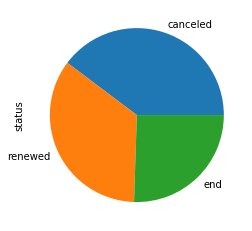

In [40]:
tv_shows_canceled_sample.status.value_counts().plot(kind='pie')

In [61]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import optuna
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [62]:
x_tvshows = tv_shows_canceled_sample.drop('status', axis=1)
y_tvshows = tv_shows_canceled_sample['status']
Xtrain, Xtest, ytrain, ytest = train_test_split(x_tvshows, y_tvshows, random_state=1)

In [73]:
def show_confusion_matrix (model):
    model.fit(Xtrain, ytrain)
    ypred_train = model.predict(Xtrain)
    y_model = model.predict(Xtest)

    print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
    print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

    mat = confusion_matrix(ytest, y_model, labels=['renewed', 'canceled', 'end'])
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')

## KNN

In [74]:
def objective(trial):
    # hyperparameter setting
    n_neighbors = trial.suggest_int('n_neighbors', 1, 200)
    
    # model training and evaluation
    model =  KNeighborsClassifier( n_neighbors=n_neighbors)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=20)


[I 2020-11-11 23:07:57,169] A new study created in memory with name: no-name-f53f39e1-f72e-4ac7-9c01-3a92011d4d28
[I 2020-11-11 23:07:57,196] Trial 0 finished with value: 0.4805194805194805 and parameters: {'n_neighbors': 65}. Best is trial 0 with value: 0.4805194805194805.
[I 2020-11-11 23:07:57,225] Trial 1 finished with value: 0.42424242424242425 and parameters: {'n_neighbors': 199}. Best is trial 0 with value: 0.4805194805194805.
[I 2020-11-11 23:07:57,250] Trial 2 finished with value: 0.4458874458874459 and parameters: {'n_neighbors': 148}. Best is trial 0 with value: 0.4805194805194805.
[I 2020-11-11 23:07:57,271] Trial 3 finished with value: 0.47186147186147187 and parameters: {'n_neighbors': 59}. Best is trial 0 with value: 0.4805194805194805.
[I 2020-11-11 23:07:57,295] Trial 4 finished with value: 0.4199134199134199 and parameters: {'n_neighbors': 165}. Best is trial 0 with value: 0.4805194805194805.
[I 2020-11-11 23:07:57,314] Trial 5 finished with value: 0.47619047619047616

ACC TRAINING:0.5434782608695652
ACC TEST:0.5367965367965368


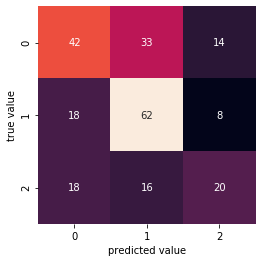

In [82]:
show_confusion_matrix(KNeighborsClassifier(**study_knn.best_params))

## Random Forest

In [75]:
classifier_rf = RandomForestClassifier(random_state=200,
                           max_depth=10,
                           n_estimators=50)
scores_rf = cross_val_score(classifier_rf, x_tvshows, y_tvshows,
                            scoring='accuracy', cv=5)

print(scores_rf.mean())

0.5863631022326674


In [76]:
def objective(trial):
    # hyperparameter setting
    max_depth = trial.suggest_int('max_depth', 3, 1000)
    random_state = trial.suggest_int('random_state', 0, 1000)
    n_estimators = trial.suggest_int('n_estimators', 1, 200)
    
    # model training and evaluation
    model =  RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_randomforest = optuna.create_study(direction='maximize')
study_randomforest.optimize(objective, n_trials=20)

[I 2020-11-11 23:07:58,047] A new study created in memory with name: no-name-fdf29b84-d1e5-484b-89fa-d872862bc03c
[I 2020-11-11 23:07:58,361] Trial 0 finished with value: 0.5670995670995671 and parameters: {'max_depth': 515, 'random_state': 580, 'n_estimators': 190}. Best is trial 0 with value: 0.5670995670995671.
[I 2020-11-11 23:07:58,528] Trial 1 finished with value: 0.5844155844155844 and parameters: {'max_depth': 873, 'random_state': 473, 'n_estimators': 108}. Best is trial 1 with value: 0.5844155844155844.
[I 2020-11-11 23:07:58,586] Trial 2 finished with value: 0.5670995670995671 and parameters: {'max_depth': 299, 'random_state': 577, 'n_estimators': 33}. Best is trial 1 with value: 0.5844155844155844.
[I 2020-11-11 23:07:58,724] Trial 3 finished with value: 0.5757575757575758 and parameters: {'max_depth': 208, 'random_state': 381, 'n_estimators': 86}. Best is trial 1 with value: 0.5844155844155844.
[I 2020-11-11 23:07:58,742] Trial 4 finished with value: 0.5541125541125541 and 

ACC TRAINING:1.0
ACC TEST:0.6060606060606061


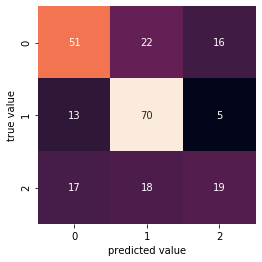

In [77]:
show_confusion_matrix(RandomForestClassifier(**study_randomforest.best_params))

## Naive Bayes

ACC TRAINING:0.49420289855072463
ACC TEST:0.42424242424242425


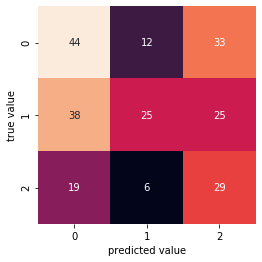

In [86]:
show_confusion_matrix(GaussianNB())

## Decision Tree

In [84]:
def objective(trial):
    # hyperparameter setting
    max_depth = trial.suggest_int('max_depth', 3, 1000)
    random_state = trial.suggest_int('max_depth', 0, 1000)
    
    # model training and evaluation
    model = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_decisiontree = optuna.create_study(direction='maximize')
study_decisiontree.optimize(objective, n_trials=20)

[I 2020-11-11 23:11:21,531] A new study created in memory with name: no-name-e0b7c0de-9e89-4034-ba34-8ef592150f25
[I 2020-11-11 23:11:21,547] Trial 0 finished with value: 0.5627705627705628 and parameters: {'max_depth': 242}. Best is trial 0 with value: 0.5627705627705628.
[I 2020-11-11 23:11:21,558] Trial 1 finished with value: 0.5411255411255411 and parameters: {'max_depth': 790}. Best is trial 0 with value: 0.5627705627705628.
[I 2020-11-11 23:11:21,568] Trial 2 finished with value: 0.5497835497835498 and parameters: {'max_depth': 334}. Best is trial 0 with value: 0.5627705627705628.
[I 2020-11-11 23:11:21,577] Trial 3 finished with value: 0.5541125541125541 and parameters: {'max_depth': 226}. Best is trial 0 with value: 0.5627705627705628.
[I 2020-11-11 23:11:21,587] Trial 4 finished with value: 0.5497835497835498 and parameters: {'max_depth': 207}. Best is trial 0 with value: 0.5627705627705628.
[I 2020-11-11 23:11:21,596] Trial 5 finished with value: 0.5757575757575758 and parame

ACC TRAINING:1.0
ACC TEST:0.5800865800865801


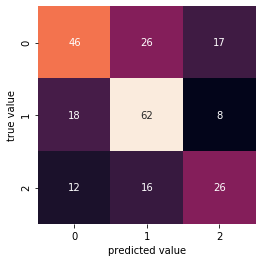

In [85]:
show_confusion_matrix(sklearn.tree.DecisionTreeClassifier(**study_decisiontree.best_params))